In [1]:
import pandas as pd


data = pd.read_csv('../data/DATA PENELITIAN GINA.csv', delimiter=";")

print(data.shape)
data

(254, 8)


,NO,NAMA,NILAI SKP,ORIENTASI,INTEGRITAS,KOMITMEN,DISIPLIN,KERJASAMA
0,1,ADAM,96.70,91.00,90.00,90.00,91.00,90.00
1,2,AGUS KUSUMA WARDANA,83.67,90.00,85.00,80.00,85.00,85.00
2,3,AGUS SOFYAN,89.52,84.00,85.00,85.00,85.00,84.00
3,4,AHYAR,88.67,91.00,82.00,85.00,85.00,81.00
4,5,AMRIN JAYA WARDI,85.45,78.00,83.00,77.00,78.00,78.00
...,...,...,...,...,...,...,...,...
249,250,Musleh,84.00,84.00,84.00,84.17,83.67,84.17
250,251,Fitra Hadi,88.00,86.00,86.05,87.42,86.28,88.77
251,252,Zulkarnaen M,89.00,86.00,86.00,86.00,86.00,86.00
252,253,Nur Sahan,82.00,84.83,85.00,85.17,84.17,85.17


In [4]:
datax = data[['NILAI SKP', 'ORIENTASI', 'INTEGRITAS', 'KOMITMEN', 'DISIPLIN', 'KERJASAMA']]
print(datax.head())

   NILAI SKP  ORIENTASI  INTEGRITAS  KOMITMEN  DISIPLIN  KERJASAMA
0      96.70       91.0        90.0      90.0      91.0       90.0
1      83.67       90.0        85.0      80.0      85.0       85.0
2      89.52       84.0        85.0      85.0      85.0       84.0
3      88.67       91.0        82.0      85.0      85.0       81.0
4      85.45       78.0        83.0      77.0      78.0       78.0
datanya


In [5]:
datax.describe(include="all")
# data.mean()

,NILAI SKP,ORIENTASI,INTEGRITAS,KOMITMEN,DISIPLIN,KERJASAMA
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,87.057874,83.953740,83.097047,82.903346,83.286732,83.071929
std,5.854388,4.169743,3.197799,3.145452,3.285836,3.379888
min,48.170000,77.500000,77.000000,77.000000,77.500000,76.000000
25%,85.330000,80.582500,80.542500,80.372500,80.500000,80.500000
50%,86.570000,83.000000,82.170000,82.000000,83.000000,82.000000
75%,88.352500,86.480000,85.000000,85.000000,85.187500,85.000000
max,130.920000,99.000000,93.000000,91.000000,93.000000,95.000000


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(datax)
centroid = kmeans.cluster_centers_

print(centroid)

[[88.94495413 87.55862385 85.73568807 85.65174312 86.28036697 86.05045872]
 [85.63931034 81.24386207 81.11351724 80.83731034 81.03634483 80.83289655]]


In [11]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

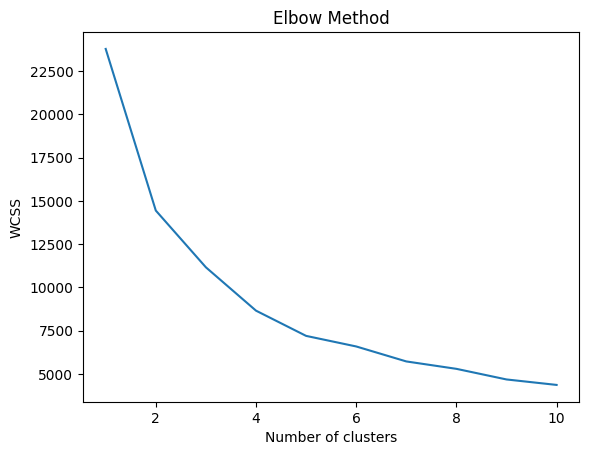

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(datax)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

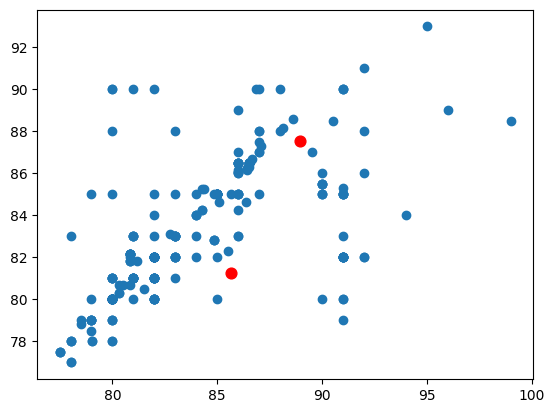

In [12]:
kmm = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmm.fit_predict(datax)
plt.scatter(datax['ORIENTASI'], datax['INTEGRITAS'])
plt.scatter(kmm.cluster_centers_[:, 0], kmm.cluster_centers_[:, 1], s=60, c='red')
plt.show()

In [13]:
for i in range(datax.shape[0]):
    if kmeans.labels_[i] == 0:
        print("Cluster Satu : ", datax.iloc[i])

Cluster Satu :  NILAI SKP     96.7
ORIENTASI     91.0
INTEGRITAS    90.0
KOMITMEN      90.0
DISIPLIN      91.0
KERJASAMA     90.0
Name: 0, dtype: float64
Cluster Satu :  NILAI SKP     83.67
ORIENTASI     90.00
INTEGRITAS    85.00
KOMITMEN      80.00
DISIPLIN      85.00
KERJASAMA     85.00
Name: 1, dtype: float64
Cluster Satu :  NILAI SKP     89.52
ORIENTASI     84.00
INTEGRITAS    85.00
KOMITMEN      85.00
DISIPLIN      85.00
KERJASAMA     84.00
Name: 2, dtype: float64
Cluster Satu :  NILAI SKP     88.67
ORIENTASI     91.00
INTEGRITAS    82.00
KOMITMEN      85.00
DISIPLIN      85.00
KERJASAMA     81.00
Name: 3, dtype: float64
Cluster Satu :  NILAI SKP     87.6
ORIENTASI     88.6
INTEGRITAS    88.6
KOMITMEN      88.6
DISIPLIN      88.6
KERJASAMA     88.6
Name: 6, dtype: float64
Cluster Satu :  NILAI SKP     88.67
ORIENTASI     85.00
INTEGRITAS    85.00
KOMITMEN      85.00
DISIPLIN      85.00
KERJASAMA     85.00
Name: 8, dtype: float64
Cluster Satu :  NILAI SKP     85.33
ORIENTASI     92

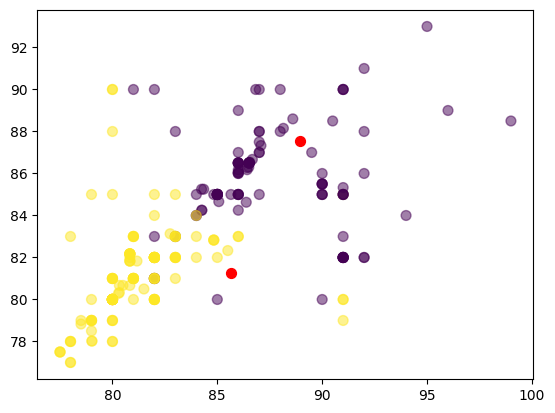

In [14]:
plt.scatter(datax['ORIENTASI'], datax['INTEGRITAS'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=50)
plt.show()

In [15]:
centroid[:,1]

array([87.55862385, 81.24386207])